In [1]:
#!/usr/local/lib/anaconda3/bin/python
# -*- coding: utf-8 -*-
import sys
import numpy as np
import matplotlib.pyplot as plt
import random
import pandas as pd
import csv

In [53]:
def F(x,t,*args):
    u,v = x
    m,k,r,h = args
    #print(m,k,r)
    
    #q = np.random.normal(0.0,0.5,1)
    w = np.sin(2*np.pi*t/10)
    print(w)
    u_new = v
    v_new = -k*u/m - r*v/m +w/m
    return np.array([u_new,v_new])

In [16]:
def Fsim(x,i,W,qold,*args):
    u = x[0]
    v = x[1]
    #print(type(u),type(v))
    m,k,r,h = args
    #print(m,k,r)
    
    #print(type(q))
    t = i*h
    w = np.sin(2*np.pi*t/10)
    if (i%2==0):
        q = np.random.normal(0.0,0.5,1)[0]
        print(q)
        w = w+q
    else:
        q = qold
        print(q)
        w = w+q
    #print(w)
    W.append(w)
    u_new = v
    v_new = -k*u/m - r*v/m +w/m
    return u_new,v_new,q

In [57]:
def Euler(x,t,*args):
    h = args[3]
    x_new = x + h*F(x,t,*args)
    return x_new

In [17]:
def Euler_sim(x,i,W,qold,*args):
    h = args[3]
    u,v,q = Fsim(x,i,W,qold,*args)
    #print(type(u),v,type(q))
    u_new = x[0] + h*u
    v_new = x[1] + h*v
    return u_new,v_new,q

In [51]:
def Rungekutta2(x,t,h,*args):
    
    x_tmp1 = F(x,t,*args)
    #print(F_)
    K1 = h*x_tmp1

    x2=x+K1/2
    t2=t+h/2
    x_tmp2 = F(x2,t2,*args)
    #print(F_)
    K2 = h*x_tmp2
    
    x_new=x+K2
    
    return x_new

In [94]:
def Rungekutta4(x,t,h,*args):
    
    x_tmp1 = F(x,t,*args)
    #print(F_)
    K1 = h*x_tmp1

    x2=x+K1/2
    t2=t+h/2
    x_tmp2 = F(x2,t2,*args)
    #print(F_)
    K2 = h*x_tmp2
    
    x3=x+K2/2
    t3=t+h/2
    x_tmp3 = F(x3,t3,*args)
    #print(F_)
    K3 = h*x_tmp3
    
    x4=x+K3
    t4=t+h
    x_tmp4 = F(x4,t4,*args)
    #print(F_)
    K4 = h*x_tmp4
    
    x_new=x+K1/6+K2/3+K3/3+K4/6
    
    return x_new

In [ ]:
h=1.0
m=1.0
k=0.5
r=0.75
args=(m,k,r,h)
u0=5.0
v0=0.0
x0=np.array([u0,v0])
Xt=[x0[0]]
Vt=[x0[1]]
Time=[0.0]
for i in range(100):
    t = i*h
    x = Euler(x0,t,*args)
    #x = Rungekutta2(x0,t,h,*args)
    #x = Rungekutta4(x0,t,h,*args)
    Xt.append(x[0])
    Vt.append(x[1])
    Time.append(t+h)
    x0 = x
    print(x)
plt.plot(Time,Xt)
plt.show()
plt.plot(Time,Vt)
plt.show()

0.0
[ 5.  -2.5]
0.5877852522924731
[ 2.5        -2.53721475]
0.9510565162951535
[-0.03721475 -0.93324717]
0.9510565162951536
[-0.97046192  0.7363521 ]
0.5877852522924732
[-0.23410982  1.25710424]
1.2246467991473532e-16
[1.02299441 0.43133097]
-0.587785252292473
[ 1.45432538 -0.99144972]
-0.9510565162951535
[ 0.46287567 -1.92608164]
-0.9510565162951536
[-1.46320597 -1.66401476]
-0.5877852522924732
[-3.12722073 -0.27218596]
-2.4492935982947064e-16
[-3.39940669  1.49556388]
0.5877852522924722
[-1.90384281  2.66137956]
0.9510565162951534
[0.75753675 2.56832281]
0.9510565162951536
[3.32585957 1.21436884]
0.5877852522924734
[ 4.54022841 -0.77155232]
3.6739403974420594e-16
[ 3.76867609 -2.46300228]
-0.5877852522924728
[ 1.3056738  -3.08787387]
-0.9510565162951534
[-1.78220006 -2.37586189]
-0.9510565162951538
[-4.15806195 -0.65392196]
-0.5877852522924735
[-4.8119839   1.32776523]
-4.898587196589413e-16
[-3.48421867  2.73793326]
0.5877852522924728
[-0.74628541  3.0143779 ]
0.9510565162951529
[2

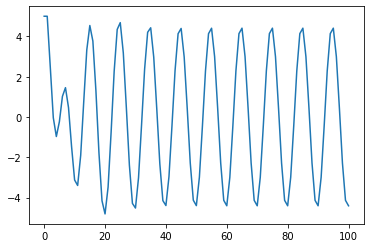

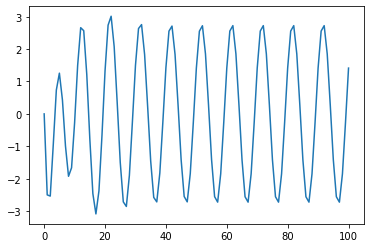

In [59]:
#df = pd.DataFrame(Xt)
#df.to_csv("fo-truex.csv",index=False)
#df2 = pd.DataFrame(Vt)
#df2.to_csv("fo-truev.csv",index=False)

In [106]:
dataset = pd.read_csv("fo-obsx.csv")
print(dataset)
array = dataset.values
print(type(array))

           0
0   3.802291
1   1.877562
2  -1.171070
3  -0.804009
4   1.254952
5  -1.654240
6  -0.896913
7   3.298094
8   3.849585
9  -0.711261
10 -4.923227
11 -0.200785
12  3.892952
13  3.143097
14 -2.999972
15 -3.896132
16  1.155449
17  3.191242
18  3.898679
19 -1.593134
20 -6.641330
21 -0.887975
22  5.652105
23  3.503686
24 -2.678701
25 -3.529105
26  0.102280
27  3.254359
28  3.229508
29 -1.291646
30 -5.624539
31 -2.476772
32  5.458334
33  3.211213
34 -1.640414
35 -1.118251
36 -0.171887
37  4.046551
38  2.252164
39 -2.599601
40 -3.642250
41 -1.385186
42  2.488532
43  2.080599
44 -3.445742
45 -4.477730
46 -1.000611
47  6.124530
48  2.685554
49 -0.711932
50 -3.194316
<class 'numpy.ndarray'>


-0.39722941635854375
0.03308985374881451
[ 6.         -2.96691015]
0.03308985374881451
[ 3.03308985 -3.12085243]
0.2845486714445093
[-0.08776258 -1.06115285]
0.2845486714445093
[-1.14891542  1.01419826]
-0.20958379464396729
[-0.13471716  1.20620874]
-0.20958379464396729
[1.07149158 0.15932697]
-0.06974572431520025
[ 1.23081855 -1.15344502]
-0.06974572431520025
[ 0.07737352 -1.92457277]
-0.4102236870207806
[-1.84719925 -1.88111016]
-0.4102236870207806
[-3.7283094  -0.54468686]
0.01170988967619514
[-4.27299626  1.73969288]
0.01170988967619514
[-2.53330338  3.17091649]
-1.0915355717283006
[0.63761311 1.91890176]
-1.0915355717283006
[2.55651487 0.02043983]
-0.9681099314178333
[ 2.5769547  -1.65347216]
-0.9681099314178333
[ 0.92348254 -2.66995532]
0.7978730654476103
[-1.74647278 -0.91914229]
0.7978730654476103
[-2.66561506  0.49026737]
-0.32475419602460875
[-2.1753477   0.17956366]
-0.32475419602460875
[-1.99578404  0.22002532]
-0.18750742077492014
[-1.77575872  0.86539093]
-0.1875074207749

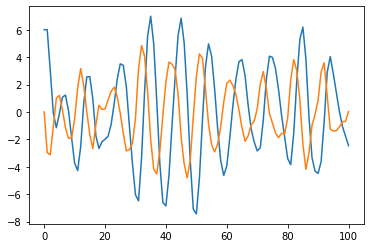

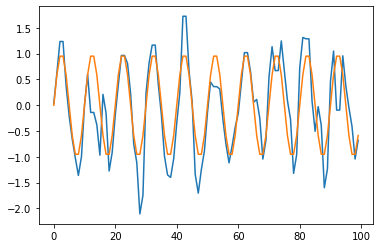

In [165]:
h=1.0
m=1.0
k=0.5
r=0.75
args=(m,k,r,h)
u0=6.0
v0=0.0
x0=np.array([u0,v0])
Xsim=[x0[0]]
Vsim=[x0[1]]
Time=[0.0]
W=[]
qold=np.random.normal(0.0,0.5,1)[0]
print(qold)
for i in range(100):
    u,v,q = Euler_sim(x0,i,W,qold,*args)
    x = np.array([u,v])
    #x = Rungekutta4(x0,t,h,*args)
    Xsim.append(x[0])
    Vsim.append(x[1])
    Time.append((i+1)*h)
    x0 = x
    qold = q
    print(x)
plt.plot(Time,Xsim)
plt.plot(Time,Vsim)
plt.show()

theta = np.arange(100)
Wtrue = np.sin(2*np.pi*theta/10.0)
plt.plot(W)
plt.plot(Wtrue)
plt.show()

df = pd.DataFrame(Xsim)
df.to_csv("fo-simx.csv",index=False)
df = pd.DataFrame(Vsim)
df.to_csv("fo-simv.csv",index=False)
df = pd.DataFrame(W)
df.to_csv("fo-simw.csv",index=False)

In [137]:
T = len(Xt)
e = np.random.randn(T)
print(e)
obs=[]
otime=[]
for i in range(T):
    if(i%2==0):
        otime.append(h*i)
        y = Xt[i]+e[i]
        obs.append(y)
print(obs)
print(type(obs[0]))
print(otime)

df = pd.DataFrame(obs)
df.to_csv("fo-obsx.csv",index=False)

[ 1.66458892e+00 -1.48399629e+00 -1.21473709e+00 -5.70968036e-01
  1.40698194e+00  5.97762381e-03  1.69658201e+00  1.50131257e-01
  1.53212231e+00 -4.65035442e-01  7.27878964e-01  2.10344525e-01
  1.04282359e+00  1.84501728e+00  1.65186410e+00 -1.14222593e+00
  5.81985433e-01 -5.22773668e-01  5.51916247e-01  8.55374293e-01
  1.46961904e-02 -1.56208622e+00 -1.00355960e+00  5.87103412e-01
  8.82858932e-03  6.89115449e-01  9.98661063e-01 -2.72889109e-01
  8.91417249e-01 -7.91189498e-01 -8.79879419e-01 -1.68587586e+00
 -1.42711274e+00  7.70507740e-02  1.09505275e+00  2.08361303e-01
  1.27402986e+00 -9.79084040e-01 -8.85567986e-01  1.50340891e+00
  1.45329323e+00  8.37464540e-01 -1.41090801e+00  1.79892302e+00
 -1.37088277e-01  2.60173941e-01  4.46482273e-01 -1.53751037e+00
  1.41704196e+00  2.59639462e-01  5.41428059e-01 -9.12309310e-01
  7.85313320e-01  2.81652331e-02  1.29160824e+00  1.29313209e+00
  1.36642080e-01  2.72064113e+00  1.65604442e+00 -8.17083351e-01
  7.75725117e-01  7.19870

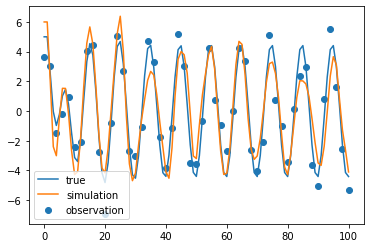

In [22]:
plt.plot(Time,Xt,label="true")
plt.plot(Time,Xsim,label="simulation")
plt.scatter(otime,obs,label="observation")
plt.legend()
plt.show()

In [25]:
def Fcst(x,i,W,*args):
    u = x[0]
    v = x[1]
    #print(type(u),type(v))
    m,k,r,h = args
    #print(m,k,r)
    
    #print(type(q))
    t = i*h
    w = W[i]
    u_new = v
    v_new = -k*u/m - r*v/m +w/m
    return u_new,v_new

In [26]:
def Euler_fcst(x,i,W,*args):
    h = args[3]
    u,v = Fcst(x,i,W,*args)
    #print(type(u),v,type(q))
    u_new = x[0] + h*u
    v_new = x[1] + h*v
    return u_new,v_new

In [44]:
def forecast(xa,Pa,i,W,*args):
    m,k,r,h = args
    M = np.array([1,h,-k*h/m,1-r*h/m]).reshape(2,2)
    G = np.array([0,h/m]).reshape(2,1)
    Q = np.array([0.5**2])
    #print(M,G,Q)
    u,v = Euler_fcst(xa,i,W,*args)
    xf = np.array([u,v])
    Pf = M@Pa@M.T + G@G.T*Q
    #Pf = Pf * 1.1
    
    return xf,Pf

In [67]:
def assimilation(xf,Pf,y,*args):
    m,k,r,h = args
    H = np.array([1.0,0.0])
    R = np.array([1.0])
    I = np.eye(2)
    #Kalman gain
    K = Pf@H.T/(R + H@Pf@H.T)
    
    dx = K*(y - H@xf)
    xa = xf + dx
    Pa = (I - K@H)@Pf
    return xa,Pa,dx

(100,) 6.664588921636112
[6. 0.] [[1. 0.]
 [0. 0.]]
[6.0, 6.0, 3.0330898537488147, -0.3790670673242058, -1.0760893008999375, 0.826247194635342, 1.7436681396055649, 1.625330145212691, -0.13870471453242894, -1.7581117329126528, -4.043247835907183, -4.213334905881996, -2.620291585997278, 1.0199713702347983, 2.6440179833653215, 3.1335596319135095, 0.9679975347305185, -1.0642118117113708, -2.7069058848059893, -2.2778428411769105, -2.4665694926429684, -3.0107630276614086, -1.510090854816097, 0.6961232732215796, 3.028788756266834, 4.641359660082985, 3.999911836229377, 1.7928990962806437, -1.5566423080935188, -4.388729127846591, -6.440300573045536, -6.179787146873356, -2.924492059957135, 2.14677791535603, 5.760299053751506, 6.61234874981621, 4.462127200251103, 0.3625358952184783, -3.8260181295899454, -6.214805506000328, -6.454533291330804, -3.3517032137068985, -0.578033533299632, 1.651838848982191, 4.539370514529465, 5.991246118356318, 4.881842189072794, 1.2284414864061253, -3.0994572331381347

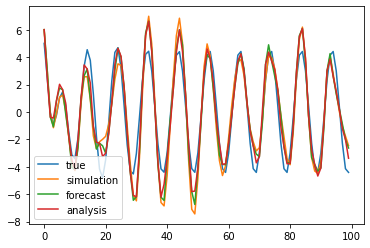

In [72]:
m=1.0
k=0.5
r=0.75
h=1.0
args=(m,k,r,h)

dataset = pd.read_csv("fo-simw.csv")
W = dataset.values.reshape(-1,)#.tolist()
dataset2 = pd.read_csv("fo-obsx.csv")
obs = dataset2.values.reshape(-1,)#.tolist()
print(W.shape,obs[0])

#initial
u0=6.0
v0=0.0
xa=np.array([u0,v0])
Pa=np.array([1.0,0.0,0.0,0.0]).reshape(2,2)
print(xa,Pa)

Xf = [xa[0]]
Vf = [xa[1]]
Xa = [xa[0]]
Va = [xa[1]]
Time = [0.0]
PF = [Pa]
PA = [Pa]
dX = [np.zeros(2)]
for i in range(100):
    xf,Pf = forecast(xa,Pa,i,W,*args)
    if((i+1)%2==0):
        y = obs[int((i+1)/2)]
        xa,Pa,dx = assimilation(xf,Pf,y,*args)
        dX.append(dx)
    else:
        xa = xf
        Pa = Pf
        dX.append(np.zeros(2))
    Xf.append(xf[0])
    Xa.append(xa[0])
    Vf.append(xf[1])
    Va.append(xa[1])
    Time.append(i*h)
    PF.append(Pf)
    PA.append(Pa)
print(Xf)
dataset = pd.read_csv("fo-truex.csv")
Xt = dataset.values.reshape(-1,)
dataset2 = pd.read_csv("fo-simx.csv")
Xsim = dataset2.values.reshape(-1,)
plt.plot(Time,Xt,label="true")
plt.plot(Time,Xsim,label="simulation")
plt.plot(Time,Xf,label="forecast")
plt.plot(Time,Xa,label="analysis")
plt.legend()
plt.show()

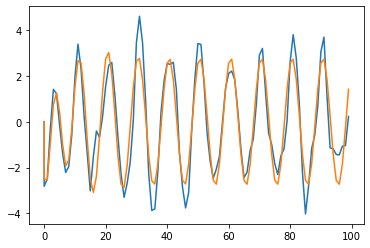

In [78]:
#RTS smoother
def M_adj(x,*args):
    u_new = x[0]
    v_new = x[1]
    #print(type(u),type(v))
    m,k,r,h = args
    #print(m,k,r)
    
    #print(type(q))
    
    u_old = u_new - k*h*v_new/m
    v_old = h*u_new + (1 - r*h/m)*v_new
    w_old = h*v_new/m
    
    return np.array([u_old,v_old])

xf = np.array([Xf[100],Vf[100]])
X_rts = [xf+dX[100]]
ut = dX[100]
for i in range(100,0,-1):
    xf = np.array([Xf[i-1],Vf[i-1]])
    Pa = PA[i-1]
    Pf = PF[i]
    Pf_inv = np.linalg.inv(Pf)
    tmp_u = Pf_inv@ut
    u = M_adj(tmp_u,*args)
    ut = Pa@u + dX[i-1]
    X_rts.append(ut+xf)
X_rts.reverse()
Xa_rts = np.array(X_rts).reshape(-1,2).T
plt.plot(Time,Xa_rts[1])
plt.plot(Time,Vt)
plt.show()

In [80]:
N = len(Xa)
print(N)
rmsea=0.0
rmsef=0.0
rmses=0.0
rmseo=0.0
for i in range(N):
    rmsea += (Xa[i]-Xt[i])**2
    rmsef += (Xf[i]-Xt[i])**2
    rmses += (Xsim[i]-Xt[i])**2
    if(i%2==0):
        rmseo += (obs[int(i/2)]-Xt[i])**2
rmsea = np.sqrt(rmsea/(N))
rmsef = np.sqrt(rmsef/(N))
rmses = np.sqrt(rmses/(N))
rmseo = np.sqrt(rmseo/(len(obs)))
print("assimilation",rmsea)
print("forecast",rmsef)
print("simulation",rmses)
print("observation",rmseo)

101
assimilation 1.0521740872931653
forecast 1.2075656155605392
simulation 1.408349043942178
observation 1.037103014828684


In [143]:
def J(x,*args):
    xf,y,B,H,R = args
    B_inv = np.linalg.inv(B)
    
    return (x-xf).T@B_inv@(x-xf)/2 + (H@x-y)*(H@x-y)/R

In [144]:
def jacobi(x,*args):
    xf,y,B,H,R = args
    B_inv = np.linalg.inv(B)
    
    return B_inv@(x-xf) + H.T*(H@x-y)/R

In [147]:
def assimilation_var(xf,y):
    from scipy import optimize
    B = np.array([1.0,0.0,0.0,0.1]).reshape(2,2)
    H = np.array([1.0,0.0])
    R = 1.0
    args2 = (xf,y,B,H,R)
    #print(type(xf),type(y),type(B),type(H),type(R))
    x = xf
    res = optimize.minimize(J,x,jac=jacobi,args=args2,method='CG',options={'gtol':1e-6, 'disp':True})
    xa = res.x
    return xa

-0.042023499575654544 6.664588921636112
[6. 0.]
         Current function value: 2.797971
         Iterations: 0
         Function evaluations: 14
         Gradient evaluations: 3
         Current function value: 3.455224
         Iterations: 0
         Function evaluations: 14
         Gradient evaluations: 3
Optimization terminated successfully.
         Current function value: 1.803184
         Iterations: 2
         Function evaluations: 4
         Gradient evaluations: 4
Optimization terminated successfully.
         Current function value: 1.737773
         Iterations: 2
         Function evaluations: 4
         Gradient evaluations: 4
Optimization terminated successfully.
         Current function value: 0.600225
         Iterations: 1
         Function evaluations: 3
         Gradient evaluations: 3
Optimization terminated successfully.
         Current function value: 0.523475
         Iterations: 1
         Function evaluations: 3
         Gradient evaluations: 3
         Cur

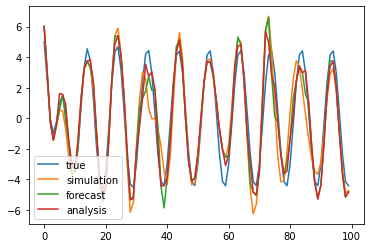

In [151]:
m=1.0
k=0.5
r=0.75
h=1.0
args=(m,k,r,h)

dataset = pd.read_csv("fo-simw.csv")
W = dataset.values.reshape(-1,).tolist()
dataset2 = pd.read_csv("fo-obsx.csv")
obs = dataset2.values.reshape(-1,).tolist()
print(W[0],obs[0])
#initial
u0=6.0
v0=0.0
xa=np.array([u0,v0])
print(xa)

Xf = [xa[0]]
Vf = [xa[1]]
Xa = [xa[0]]
Va = [xa[1]]
Time = [0.0]
trPf=[]
for i in range(100):
    u,v = Euler_fcst(xa,i,W,*args)
    xf = np.array([u,v])
    if((i+1)%2==0):
        y = obs[int((i+1)/2)]
        #print(type(y))
        xa = assimilation_var(xf,y)
    else:
        xa = xf
        Pa = Pf
    Xf.append(xf[0])
    Xa.append(xa[0])
    Vf.append(xf[1])
    Va.append(xa[1])
    Time.append(i*h)
    trPf.append(Pf[0,0])

dataset = pd.read_csv("fo-truex.csv")
Xt = dataset.values.reshape(-1,)
dataset2 = pd.read_csv("fo-simx.csv")
Xsim = dataset2.values.reshape(-1,)
plt.plot(Time,Xt,label="true")
plt.plot(Time,Xsim,label="simulation")
plt.plot(Time,Xf,label="forecast")
plt.plot(Time,Xa,label="analysis")
plt.legend()
plt.show()

In [173]:
def F_adj(x,*args):
    m,k,r,h = args
    x_old,v_old,w_old = x
    x_new = x_old - k*h*v_old/m
    v_new = h*x_old +(1-r*h/m)*v_old
    w_new = h*v_old/m
    return np.array([x_new,v_new,w_new])

In [174]:
def J_adj(x,*args):
    x0 = x[0]
    w = x[1:]
    xb,wb,Hx,y,sigb,sigw,sigo = args
    return ((x0-xb)**2/sigb**2 + np.sum((w-wb)**2) /sigw**2 + np.sum((Hx[2::2]-y[1:])**2)/sigo**2)/2

In [163]:
a = np.arange(101)
b = np.arange(51)
print(a[2::2])
print(b[1:])

[  2   4   6   8  10  12  14  16  18  20  22  24  26  28  30  32  34  36
  38  40  42  44  46  48  50  52  54  56  58  60  62  64  66  68  70  72
  74  76  78  80  82  84  86  88  90  92  94  96  98 100]
[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48
 49 50]


In [193]:
def jac_adj(x,*args):
    x0 = x[0]
    w = x[1:]
    #print(w)
    xb,wb,Hx,y,sigb,sigw,sigo,m,k,r,h = args
    args1 = m,k,r,h
    #print(wb)
    
    Lam = []
    #lamx_101=lamv_101=0.0
    lamx = (Hx[100]-y[int(100/2)])/sigo**2 #lamx_100
    lamv = 0.0 #lamv_100
    lamw = 0.0 #lamw_100(no defined)
    lam = np.array([lamx,lamv,lamw])
    #print(100,lam)
    #print(lamx)
    dJ = np.zeros(3)
    for i in range(99,-1,-1):
        if(i!=0 and i%2==0):
            dJ[0] = (Hx[i]-y[int(i/2)])/sigo**2
        elif(i==0):
            dJ[0] = (x0-xb)/sigb**2
        else:
            dJ[0] = 0.0
        dJ[2] = -(w[i]-wb[i])/sigw**2
        lam_t = F_adj(lam,*args1)
        lam_t += dJ
        #print(i,lam_t)
        #lamx_t = lamx - k*h*lamv/m +dxJ
        #lamv_t = h*lamx + (1-r*h/m)*lamv
        #lamw_t = h*lamv/m - (w[i]-wb[i])/sigw**2
        #print(lamx_t,lamv_t,lamw_t)
        Lam.append(lam_t[2])
        lam = lam_t
        #lamx = lamx_t
        #lamv = lamv_t
    Lam.append(lam_t[0])
    return np.array(Lam[::-1])

In [189]:
x0 = 6.0
w = np.random.rand(100)
x = np.append(x0,w)
print(x)
xb = 6.0
dataset = pd.read_csv("fo-simw.csv")
W = dataset.values.reshape(-1,).tolist()
wb = np.array(W)
#w = wb+0.5
#x = np.append(x0,w)
print(wb)
Hx = np.array(Xsim)
y = np.array(obs)
#y = Hx[::2]+1.0
print(Hx.shape)
print(y.shape)
sigb = 1.0
sigw = 0.5
sigo = 1.0
m=1.0
k=0.5
r=0.75
h=1.0
args1 = (xb,wb,Hx,y,sigb,sigw,sigo)
args2 = (m,k,r,h)
args = args1+args2 
j0 = J_adj(x,*args1)
print(j0)
la = jac_adj(x,*args)
print(la)

[6.00000000e+00 1.62102647e-01 9.54399020e-01 3.99318543e-01
 3.66929139e-01 3.20660225e-01 3.43900121e-01 6.66444547e-02
 8.68634995e-01 6.60170754e-01 7.65628172e-01 6.33750187e-01
 2.28193077e-01 4.73615980e-01 9.83576414e-01 9.79799749e-03
 8.45111219e-01 1.53426051e-01 6.12597106e-01 8.27856797e-01
 1.13029513e-01 1.34151238e-01 5.00722342e-01 5.85850623e-01
 5.31976795e-01 6.26425082e-01 9.23571936e-02 3.51944752e-01
 2.57198764e-01 4.66381041e-03 4.02061255e-01 2.71210292e-01
 7.44061397e-01 6.69570159e-01 8.95464219e-01 1.49696400e-01
 7.76857995e-01 3.55556008e-01 2.97400212e-01 2.04897147e-01
 8.38372677e-01 7.69032179e-01 7.01508052e-01 1.41990807e-01
 8.54674924e-01 1.22938910e-01 4.33335411e-02 7.97685097e-01
 4.46574849e-01 9.63650169e-01 9.07443089e-01 5.64835378e-01
 9.56641042e-01 8.01833125e-01 7.12683566e-01 2.03994503e-01
 4.16498396e-01 5.96025426e-01 3.47107188e-01 2.72886967e-01
 2.00598954e-01 5.06805547e-01 7.87375039e-02 3.62650160e-01
 6.45189957e-01 9.322185

In [190]:
def CG(x,d0,*args):
    #alpha = golden_section(d0,dv0,U,R_inv,H,y,Fcst,M,MT,a_window)
    alpha=0.01
    x_new = x + alpha*d0
    d = jac_adj(x_new,*args)
    #err = np.sqrt(np.sum(d**2))
    #print(k,err)          
    p = -d + (np.dot(d.T,d)/np.dot(d0.T,d0))*d0
    x = x_new
    d0 = p
    return x_new,d,p

0.03308985374881451 6.664588921636112
[0.         0.94383988 0.97224517 0.90553566 0.67863544 0.33796763
 0.94559433 0.02032948 0.96508002 0.53551313 0.90166687 0.32462854
 0.14417094 0.09733546 0.70614075 0.04507412 0.23175417 0.04596346
 0.33780312 0.55339713 0.24684737 0.71668279 0.95133176 0.50388055
 0.2339694  0.20413866 0.09161816 0.251396   0.17541039 0.98001992
 0.86122698 0.2167153  0.54619887 0.81664949 0.56041315 0.27619253
 0.97124886 0.17052363 0.33990798 0.41885891 0.80280976 0.76179669
 0.63721893 0.95124791 0.14679137 0.6456246  0.49345089 0.29551046
 0.03268991 0.58803727 0.35794766 0.27858832 0.48243002 0.4653897
 0.66928074 0.69680836 0.59461108 0.41624741 0.13063653 0.74631351
 0.57439231 0.43320867 0.07040328 0.38869023 0.09767851 0.53548821
 0.68347176 0.4145612  0.13086829 0.67351628 0.77470303 0.76220191
 0.3383919  0.15296166 0.8783763  0.01039725 0.66416135 0.91092661
 0.90943061 0.7759046  0.24485325 0.99070338 0.72851657 0.7941105
 0.23315925 0.33733289 0.3

[1859.8515352537702, 2577.766262411626, -4422.045445830225, 1073.7053455304094, 2420.126562329193, 14945.98547639682, -17972.55928581512, 11790.298002036372, -3194.7932381819, 14630.14288791218, -11905.731362775152, 696.0468150374414, 6121.823165461349, 5239.5060753210855, -8269.75553994456, 20915.10304803548, -20142.123267909363, -609.7741041926495, 16552.086179632355, -3374.0656012086124, -7068.874232534951, 7899.012223567522, -4639.322783283082, 1615.5003297841843, 2170.539157796112, -1077.4644780496349, 595.4809315867291, -11733.9297411928, 13846.933659836144, 17634.11897902353, -30681.183629648956, 8412.50330336517, 11785.807042578974, -1631.581079114309, -4927.33338436411, 8342.551507589178, -7504.447963298322, 9968.770548207576, -4674.625987099459, 6280.684240032797, -5654.955725557017, 8092.67826366857, -3120.049993811343, -10077.741384067906, 13371.707992515112, -6981.507775833352, 1358.8616897650013, 532.5972033322097, -2395.3964060854933, 8188.810694582191, -6815.81064549929

[6755480.62441165, 63329016.74211316, -85216415.7025307, 23278891.70720473, 35753688.71133586, 288016843.6638772, -381050093.6417699, 277310000.3845846, -69602642.97352865, 264175122.7245036, -267181366.37273225, 44278069.895389155, 134727474.55002326, 80660428.12671676, -193072844.776956, 446911131.43656677, -419769888.98867804, -16397347.242809577, 338899969.88367665, -81240575.48534843, -154028965.72116983, 170749553.06714702, -97169980.90090802, 28275667.262721475, 36814296.55336347, -29761828.557696376, 11515435.505138807, -238853386.94599053, 286781108.8753892, 353117056.7741801, -651632849.1155113, 189156621.34905687, 246265122.32649982, -53200099.16779606, -110817923.79311103, 188488561.22225842, -160654874.47647008, 187215980.9622943, -104349506.75899954, 151676894.86410406, -120852438.01450834, 140625037.3768582, -75245049.4702558, -188603580.21698484, 282962005.678655, -174642188.83821017, 14429191.029594379, 24803262.597894587, -48165291.921777286, 157662082.39893967, -1565

[25491338351.85911, 1214405978796.6282, -1543362902491.1553, 430964534564.04614, 625959310138.3416, 5271011783888.773, -7042857445579.164, 5228809644329.369, -1280900769721.5137, 4773547635165.914, -4970953112778.256, 931193615918.1906, 2526949253414.692, 1399569039859.706, -3610038260443.4287, 8335324410809.155, -7740350705260.8125, -339912342913.0311, 6251989793724.787, -1489418723088.8635, -2842951729707.215, 3154561298628.2744, -1799032245730.2678, 530146409165.6092, 675611145333.2664, -569540716010.5303, 218076338599.01212, -4387701965073.876, 5304238691947.953, 6485359385608.968, -12062699706727.48, 3565105189100.3154, 4562751227407.178, -1062232188784.7156, -2060897573514.3425, 3575752824459.6753, -2961927042412.0806, 3368305947359.599, -1947766263388.3428, 2909089136372.222, -2218156734752.7886, 2498209806524.1855, -1417054399241.2063, -3391986952151.542, 5263497538777.756, -3320392438838.592, 237348254163.62708, 526880135605.8327, -864721435708.3734, 2872296360834.025, -292046

[78013119902422.9, 1.545104475744275e+16, -1.9397635937694264e+16, 5412597679572958.0, 7814923562069190.0, 6.642238751913157e+16, -8.885992989811469e+16, 6.619509479025683e+16, -1.6161465611080552e+16, 5.999576261244061e+16, -6.278483983047723e+16, 1.2021961406423272e+16, 3.1960668703396612e+16, 1.7417013551227868e+16, -4.56408606239984e+16, 1.0541078957956931e+17, -9.762544336608642e+16, -4443690915535154.5, 7.885366880752168e+16, -1.8690310332552904e+16, -3.5844634893497664e+16, 3.9735120790988664e+16, -2.2727333317311052e+16, 6765415418994544.0, 8534077598288960.0, -7276193754304314.0, 2752398795474246.0, -5.526392444003559e+16, 6.694897112163786e+16, 8.170141745563498e+16, -1.5225867422166182e+17, 4.519462408013558e+16, 5.760560983084856e+16, -1.3643441835665458e+16, -2.6039672433359276e+16, 4.540137301403519e+16, -3.734498397650611e+16, 4.222143852194919e+16, -2.4636334461287584e+16, 3.702102384885382e+16, -2.793407879500699e+16, 3.123248883790934e+16, -1.795765925330419e+16, -4.2

[1.7779119360948144e+17, 1.2502943123242097e+20, -1.5648913483674816e+20, 4.360808006831571e+19, 6.2950731847477805e+19, 5.3624098421757175e+20, -7.174821777689598e+20, 5.3482120367296374e+20, -1.3051553501907817e+20, 4.8407104665544026e+20, -5.070437330302523e+20, 9.753159980632236e+19, 2.5817711981259227e+20, 1.401923989794902e+20, -3.6866929246999845e+20, 8.516156141414281e+20, -7.882181695472746e+20, -3.623592904621152e+19, 6.366460316759834e+20, -1.5063274708905165e+20, -2.8936507324835388e+20, 3.20614507491358e+20, -1.8358553733794687e+20, 5.486634084277877e+19, 6.895234968717581e+19, -5.9004657535003165e+19, 2.22005092331374e+19, -4.459731329020389e+20, 5.406421458374038e+20, 6.593988707910489e+20, -1.2295336058989136e+21, 3.6536999701664426e+20, 4.652141414112238e+20, -1.106593408940665e+20, -2.1033578771456518e+20, 3.6716616079765923e+20, -3.014795176917539e+20, 3.403581298134605e+20, -1.990489368368208e+20, 2.995485685999076e+20, -2.2544355578458846e+20, 2.516180850818145e+20

[3.4656471760686036e+20, 7.82690548063658e+23, -9.78774735560764e+23, 2.72577767156846e+23, 3.9357332351100634e+23, 3.354700185160089e+24, -4.488547695041329e+24, 3.3462812701779193e+24, -8.165673546868544e+23, 3.0278747278954366e+24, -3.172186584241914e+24, 6.108304933150404e+23, 1.6153032861045788e+24, 8.763674765603215e+23, -2.3066005079904902e+24, 5.328519220448492e+24, -4.931047582785722e+24, -2.2733015226865415e+23, 3.98279338289341e+24, -9.418071957876798e+23, -1.810169633941318e+24, 2.0052851558707884e+24, -1.1486558595404825e+24, 3.4376206719067125e+23, 4.3146828912386615e+23, -3.696688808261051e+23, 1.3881535915073183e+23, -2.789497845754938e+24, 3.3824083309282733e+24, 4.1246431485873135e+24, -7.692225409212879e+24, 2.2865612705801153e+24, 2.9105444847946705e+24, -6.931465518885684e+23, -1.3160138138899227e+24, 2.2979724234054476e+24, -1.885949158713201e+24, 2.128354118898459e+24, -1.2454649383668653e+24, 1.8750188918247907e+24, -1.4101985945666405e+24, 1.5731828145652132e+2

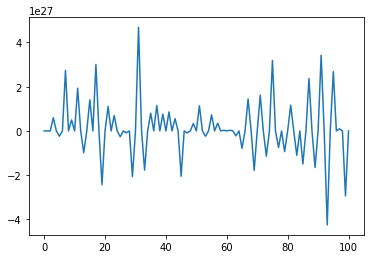

In [199]:
dataset = pd.read_csv("fo-simw.csv")
W = dataset.values.reshape(-1,).tolist()
dataset2 = pd.read_csv("fo-obsx.csv")
obs = dataset2.values.reshape(-1,).tolist()
print(W[0],obs[0])
dataset3 = pd.read_csv("fo-simx.csv")
Xsim = dataset3.values.reshape(-1,)
dataset4 = pd.read_csv("fo-simv.csv")
Vsim = dataset4.values.reshape(-1,)

x0 = 0.0
w = np.random.rand(100)
x = np.append(x0,w)
print(x)
xb = 6.0
wb = np.array(W)
Hx = np.array(Xsim)
y = np.array(obs)
print(Hx.shape)
print(y.shape)
sigb = 1.0
sigw = 0.5
sigo = 1.0
m=1.0
k=0.5
r=0.75
h=1.0
args1 = (m,k,r,h)
args2 = (xb,wb,Hx,y,sigb,sigw,sigo)
args = args2 + args1

d0 = -jac_adj(x,*args)
print(d0)
for i in range(1000):
    args = args2 + args1
    
    xa,d,p = CG(x,d0,*args)
    d0 = p
    Hx = [xa[0]]
    W = xa[1:].tolist()
    print(W)
    xf = np.array([xa[0],Vsim[0]])
    for l in range(100):
        u,v = Euler_fcst(xf,l,W,*args1)
        xf = np.array([u,v])
        Hx.append(xf[0])
    args2 = (xb,wb,Hx,y,sigb,sigw,sigo)
    J = J_adj(xa,*args2)
    print(J)
    if(np.sqrt(np.sum(d**2))<1e-5):
        print(i,"end")
    x = xa
xf = np.array([xa[0],Vsim[0]])
Xa = [xf[0]]
Va = [xf[1]]
for l in range(100):
    u,v = Euler_fcst(xf,l,W,*args1)
    xf = np.array([u,v])
    Xa.append(xf[0])
    Va.append(xf[1])
plt.plot(Time,Xa)
plt.show()


In [2]:
def F_tlm2(x,*args):
    m,k,r,h = args
    x_old,v_old,w_old,w_old2 = x
    x_new = (1 - k*h**2/m)*x_old + (2*h - r*h**2/m)*v_old + h**2/m*w_old
    v_new = (-2*k*h/m + r*k*h**2/m**2)*x_old + (-k*h**2/m + (1-r*h/m)**2)*v_old + h/m*(1 - r*h/m)*w_old + h/m*w_old2
        #w_new = w_old
    return x_new,v_new

In [3]:
def F_adj2(x,*args):
    m,k,r,h = args
    x_new,v_new = x
    x_old = (1 - k*h**2/m)*x_new + (-2*k*h/m + r*k*h**2/m**2)*v_new 
    v_old = (2*h - r*h**2/m)*x_new + (-k*h**2/m + (1-r*h/m)**2)*v_new 
    w_old = h**2/m*x_new + h/m*(1 - r*h/m)*v_new
    w_old2 = h/m*v_new
    return x_old,v_old,w_old,w_old2

In [14]:
def J_adj2(x,*args):
    x0 = x[0]
    v0 = x[1]
    w = x[2:]
    xb,wb,y,sigb,sigw,sigo,m,k,r,h = args
    args1 = m,k,r,h
    
    j0 = 0.0
    x_old = x0
    v_old = v0
    w_old = w[0]
    w_old2 = w[1]
    for n in range(1,50):
        x_ = np.array([x_old,v_old,w_old,w_old2])
        x_new,v_new = F_tlm2(x_,*args1)
        j0 += (x_new-y[n])**2/(sigo)**2
        x_old = x_new
        v_old = v_new
        w_old = w[2*n]
        w_old2 = w[2*n+1]
    x_ = np.array([x_old,v_old,w_old,w_old2])
    x_new,v_new = F_tlm2(x_,*args1)
    j0 += (x_new-y[50])**2/(sigo)**2
        
    return ((x0-xb)**2/sigb**2 + np.sum((w-wb)**2) /sigw**2 + j0)/2

In [38]:
def jac_adj2(x,*args):
    x0 = x[0]
    v0 = x[1]
    w = x[2:]
    #print(w)
    xb,wb,y,sigb,sigw,sigo,m,k,r,h = args
    args1 = m,k,r,h
    #print(wb)
    
    dt = np.zeros(x.size).reshape(x.shape)
    #increment
    d = np.zeros(51)
    x_old = x0
    v_old = v0
    w_old = w[0]
    w_old2 = w[1]
    for n in range(1,50):
        x_ = np.array([x_old,v_old,w_old,w_old2])
        x_new,v_new = F_tlm2(x_,*args1)
        d[n] = (x_new-y[n])/(sigo)**2
        x_old = x_new
        v_old = v_new
        w_old = w[2*n]
        w_old2 = w[2*n+1]
    x_ = np.array([x_old,v_old,w_old,w_old2])
    x_new,v_new = F_tlm2(x_,*args1)
    d[50] = (x_new-y[50])/(sigo)**2
    print(d)
    
    dt[0] = d[50]
    print(dt)
    for n in range(1,51):
        print(dt[:2])
        x_old,v_old,w_old,w_old2 = F_adj2(dt[:2],*args1)
        dt[0] = x_old + d[50-n]
        dt[1] = v_old
        dt[-(2*n-1)] = w_old2
        dt[-2*n] = w_old
    print(dt)    
    dt[0] += (x0-xb)/sigb**2
    dt[2:] += (w-wb)/sigw**2
    print(dt)
    return dt

In [62]:
from scipy import optimize

dataset = pd.read_csv("fo-simw.csv")
W = dataset.values.reshape(-1,).tolist()
dataset2 = pd.read_csv("fo-obsx.csv")
obs = dataset2.values.reshape(-1,).tolist()
print(W[0],obs[0])
dataset3 = pd.read_csv("fo-simx.csv")
Xsim = dataset3.values.reshape(-1,)
dataset4 = pd.read_csv("fo-simv.csv")
Vsim = dataset4.values.reshape(-1,)

x0 = 0.0
v0 = 0.0
w = np.random.rand(100)
x = np.append(np.array([x0,v0]),w)
print(x)
xb = 6.0
wb = np.array(W)
#Hx = np.array(Xsim)
y = np.array(obs)
#print(Hx.shape)
print(y.shape)
sigb = 1.0
sigw = 0.5
sigo = 1.0
m=1.0
k=0.5
r=0.75
h=1.0
args1 = (m,k,r,h)
args2 = (xb,wb,y,sigb,sigw,sigo)
args = args2 + args1

res = optimize.minimize(J_adj2,x,jac=jac_adj2,args=args,method='CG',options={'gtol':1e-6, 'disp':True})
xa = res.x

0.03308985374881451 6.664588921636112
[0.         0.         0.65071611 0.77837272 0.36912334 0.24896514
 0.89084743 0.82416907 0.26976291 0.54614485 0.43829314 0.59062787
 0.80406261 0.55916354 0.1569199  0.71367733 0.41189135 0.41406877
 0.95987588 0.05582535 0.47214159 0.48128009 0.51899988 0.95577043
 0.22715406 0.40599601 0.32581608 0.06255364 0.0845352  0.0273812
 0.47714312 0.56360127 0.07581787 0.18887991 0.9847954  0.25849865
 0.52358637 0.33023346 0.44961666 0.80400566 0.6148078  0.19750229
 0.54651868 0.99086945 0.03699339 0.54431975 0.06836693 0.32609065
 0.10367814 0.74946585 0.10917332 0.96654345 0.72976724 0.36225227
 0.73913619 0.61523868 0.28808096 0.34095538 0.75298348 0.47005264
 0.83433362 0.46830535 0.70842836 0.98339908 0.87131516 0.76865633
 0.87431164 0.7465732  0.5100413  0.67113928 0.41048077 0.88967013
 0.17281478 0.19236886 0.2600548  0.87747836 0.88384609 0.70115497
 0.06063351 0.97601489 0.81842143 0.89294953 0.80686637 0.07783566
 0.82413603 0.03332579 0.

 -0.01913305  0.40941372  1.12283658]
[1.12283658 0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.    

[-1.44709776 -1.72065473]
[ 0.91032922 -1.05608576]
[0.91746175 1.59994904]
[0.31001063 0.44684948]
[-1.84952194  0.19201664]
[-1.08730046 -2.3959097 ]
[ 0.53249925 -0.31091509]
[0.50175754 0.80164942]
[-0.66566525  0.27647531]
[-0.90508529 -0.95303951]
[-0.13643569 -0.71440183]
[0.09096542 0.14200619]
[-0.55891804  0.05157907]
[-0.09361262 -0.72121339]
[1.29630514 0.19851509]
[-0.45579999  1.53353108]
[-2.59489242 -1.24066984]
[-1.83884884 -2.70082247]
[-0.74011519 -1.11695121]
[-0.86849337 -0.43647784]
[-1.3338046  -0.89465766]
[-0.45778973 -1.27584302]
[-0.53766253 -0.01405583]
[-0.23308059 -0.66592874]
[ 2.99665169e-01 -6.90925007e-06 -3.99562771e-01 -6.65928739e-01
 -5.41176492e-01 -1.40558339e-02 -7.76750481e-01 -1.27584302e+00
 -1.55746901e+00 -8.94657655e-01 -9.77612825e-01 -4.36477835e-01
 -1.01935300e+00 -1.11695121e+00 -2.51405445e+00 -2.70082247e+00
 -2.90505988e+00 -1.24066984e+00 -7.24172239e-02  1.53353108e+00
  1.34593391e+00  1.98515086e-01 -2.73915966e-01 -7.21213391e

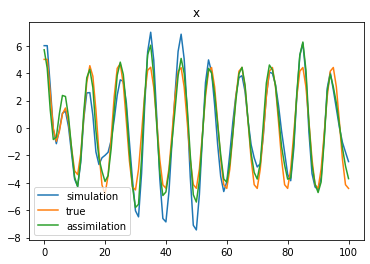

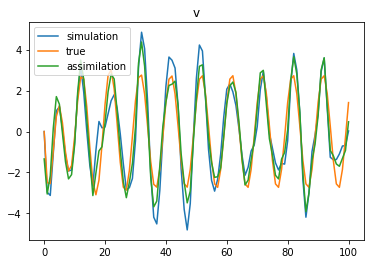

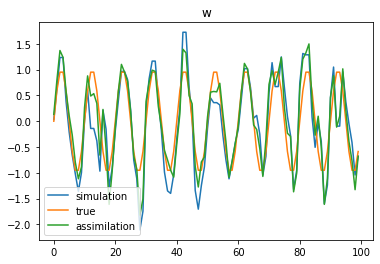

In [64]:
xf = np.array([xa[0],xa[1]])
W = xa[2:].tolist()
Xa = [xf[0]]
Va = [xf[1]]
Time = [0.0]
for l in range(100):
    u,v = Euler_fcst(xf,l,W,*args1)
    xf = np.array([u,v])
    Xa.append(xf[0])
    Va.append(xf[1])
    Time.append((l+1)*h)
dataset3 = pd.read_csv("fo-truex.csv")
Xt = dataset3.values.reshape(-1,)
plt.plot(Time,Xsim,label="simulation")
plt.plot(Time,Xt,label="true")
plt.plot(Time,Xa,label="assimilation")
plt.title("x")
plt.legend()
plt.show()
dataset4 = pd.read_csv("fo-truev.csv")
Vt = dataset4.values.reshape(-1,)
plt.plot(Time,Vsim,label="simulation")
plt.plot(Time,Vt,label="true")
plt.plot(Time,Va,label="assimilation")
plt.title("v")
plt.legend()
plt.show()
plt.plot(Time[:100],wb,label="simulation")
wt = np.sin(2*np.pi/10.0*np.array(Time[:100]))
plt.plot(Time[:100],wt,label="true")
plt.plot(Time[:100],W,label="assimilation")
plt.title("w")
plt.legend()
plt.show()

In [65]:
N = len(Xa)
print(N)
rmsea=0.0
rmsef=0.0
rmses=0.0
rmseo=0.0
for i in range(N):
    rmsea += (Xa[i]-Xt[i])**2
    #rmsef += (Xf[i]-Xt[i])**2
    rmses += (Xsim[i]-Xt[i])**2
    if(i%2==0):
        rmseo += (obs[int(i/2)]-Xt[i])**2
rmsea = np.sqrt(rmsea/(N))
#rmsef = np.sqrt(rmsef/(N-50))
rmses = np.sqrt(rmses/(N))
rmseo = np.sqrt(rmseo/(len(obs)))
print("assimilation",rmsea)
#print("forecast",rmsef)
print("simulation",rmses)
print("observation",rmseo)

101
assimilation 0.8044025697438535
simulation 1.408349043942178
observation 1.037103014828684


In [39]:
x0 = 6.0
v0 = 0.0
w = np.random.rand(100)
x = np.append(np.array([x0,v0]),w)
print(x)
xb = 6.0
dataset = pd.read_csv("fo-simw.csv")
W = dataset.values.reshape(-1,).tolist()
wb = np.array(W)
#w = wb+0.5
#x = np.append(x0,w)
print(wb)
dataset = pd.read_csv("fo-obsx.csv")
obs = dataset.values.reshape(-1,).tolist()
y = np.array(obs)
#y = Hx[::2]+1.0
print(y.shape)
sigb = 1.0
sigw = 0.5
sigo = 1.0
m=1.0
k=0.5
r=0.75
h=1.0
args1 = (xb,wb,y,sigb,sigw,sigo)
args2 = (m,k,r,h)
args = args1+args2 
j0 = J_adj2(x,*args)
print(j0)
la = jac_adj2(x,*args)
print(la)

[6.         0.         0.55979163 0.58323195 0.02406703 0.27519304
 0.22243431 0.5317169  0.25789472 0.4785984  0.91961555 0.26948297
 0.40371016 0.83637246 0.05294356 0.41227328 0.28843828 0.72828923
 0.4639191  0.51972622 0.3602766  0.55567132 0.44557954 0.91480333
 0.069704   0.45903082 0.74669806 0.68131721 0.48518506 0.32778945
 0.77079981 0.55144861 0.68325207 0.77146324 0.96145084 0.78802107
 0.67794722 0.82770348 0.85104663 0.88951093 0.40060373 0.39190772
 0.54604876 0.06806626 0.58606023 0.47736151 0.92235281 0.71508849
 0.14361324 0.89677501 0.39500312 0.09929761 0.58315299 0.34641117
 0.40813873 0.50012564 0.91495287 0.88184112 0.41395127 0.65015649
 0.02621597 0.36368333 0.11061807 0.37711644 0.28207878 0.96024132
 0.72025753 0.5413648  0.80343149 0.79110338 0.26983381 0.98936457
 0.56482021 0.24729633 0.52718535 0.49566408 0.95551127 0.0269249
 0.17125638 0.88644711 0.99654272 0.62537694 0.94790004 0.98206053
 0.57047293 0.15625023 0.20362703 0.46597948 0.05806114 0.27394

In [11]:
x = np.arange(50)
for k in range(1,51):
    print(-k,x[-k])

-1 49
-2 48
-3 47
-4 46
-5 45
-6 44
-7 43
-8 42
-9 41
-10 40
-11 39
-12 38
-13 37
-14 36
-15 35
-16 34
-17 33
-18 32
-19 31
-20 30
-21 29
-22 28
-23 27
-24 26
-25 25
-26 24
-27 23
-28 22
-29 21
-30 20
-31 19
-32 18
-33 17
-34 16
-35 15
-36 14
-37 13
-38 12
-39 11
-40 10
-41 9
-42 8
-43 7
-44 6
-45 5
-46 4
-47 3
-48 2
-49 1
-50 0
